In [1]:
#pip install yfinance

In [2]:
import yfinance as yf

In [173]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [174]:
stock = "NVDA"
nvidia_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [128]:
import pandas as pd

In [175]:
nvidia_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2005-01-06,0.171648,0.187167,0.194583,0.185833,0.192333,563568000
2005-01-07,0.168361,0.183583,0.189000,0.180833,0.187583,763092000
2005-01-10,0.168744,0.184000,0.185833,0.182917,0.184167,579552000
2005-01-11,0.163547,0.178333,0.183250,0.175583,0.182250,1093380000
2005-01-12,0.162171,0.176833,0.180583,0.172500,0.179917,1057800000


In [176]:
nvidia_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-01-06 to 2025-01-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  5032 non-null   float64
 1   (Close, NVDA)      5032 non-null   float64
 2   (High, NVDA)       5032 non-null   float64
 3   (Low, NVDA)        5032 non-null   float64
 4   (Open, NVDA)       5032 non-null   float64
 5   (Volume, NVDA)     5032 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [177]:
nvidia_data.shape

(5032, 6)

In [178]:
nvidia_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,10.635569,10.665907,10.859033,10.454514,10.665864,5.431958e+08
std,25.163982,25.160459,25.623359,24.659588,25.178039,3.220750e+08
min,0.135270,0.147500,0.159500,0.143750,0.150000,4.564400e+07
25%,0.339750,0.368937,0.374500,0.363250,0.369000,3.351935e+08
50%,0.566791,0.614459,0.624500,0.600917,0.613042,4.754405e+08
75%,6.495471,6.552688,6.602125,6.421250,6.516062,6.634050e+08
max,148.869751,148.880005,152.889999,146.259995,149.350006,3.692928e+09


In [179]:
nvidia_data.isna().sum()

,,0
Price,Ticker,
Adj Close,NVDA,0
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x500 with 0 Axes>

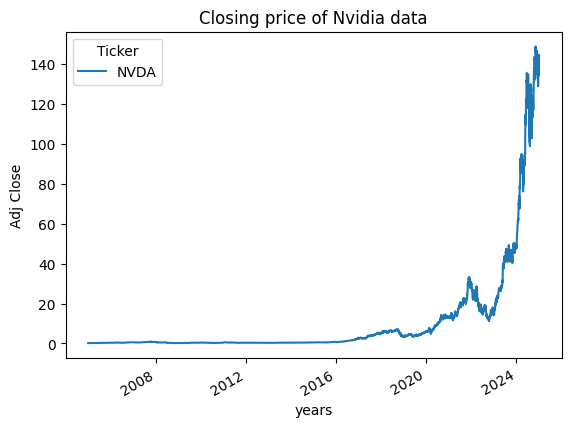

In [181]:
plt.figure(figsize=(15,5))
nvidia_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing price of Nvidia data")
plt.show()

In [182]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Nvidia data")

In [183]:
nvidia_data.columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

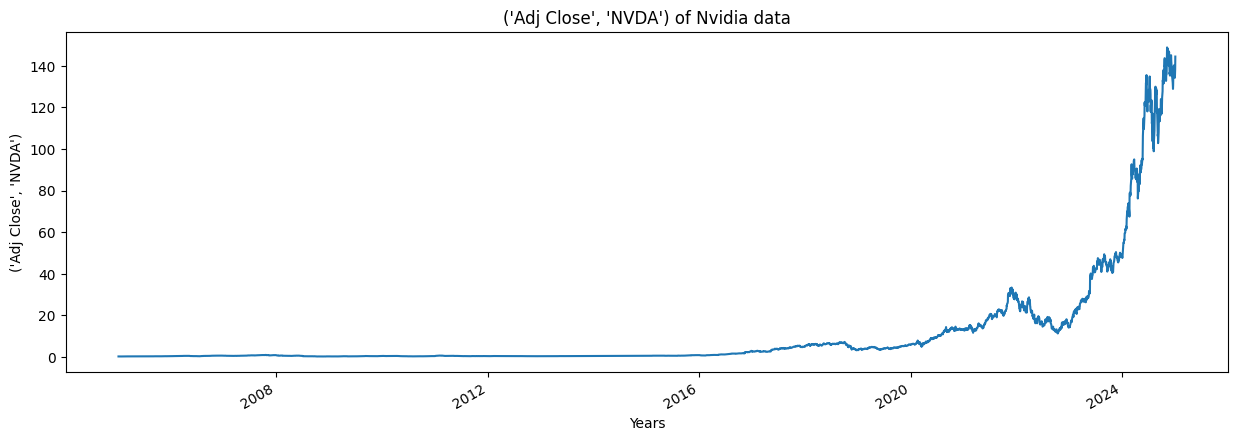

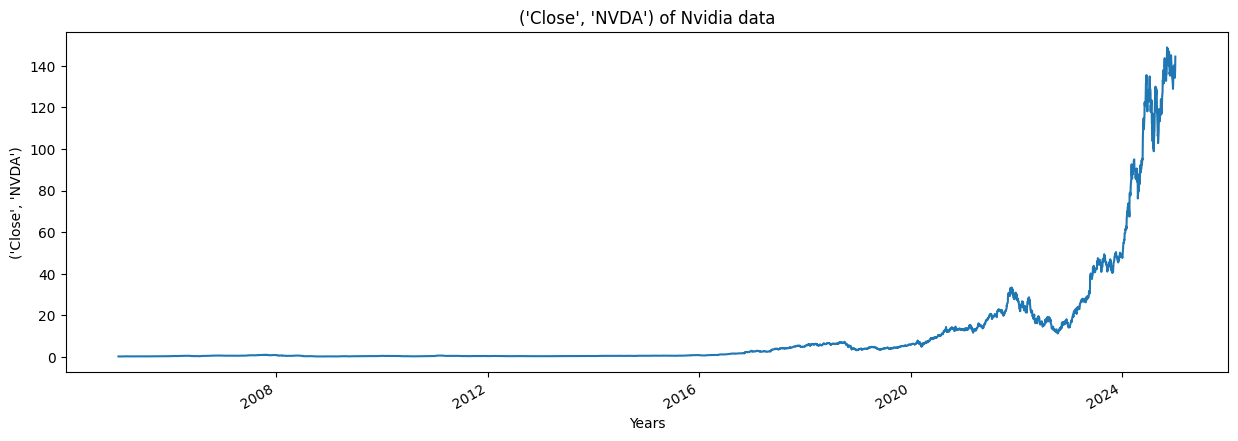

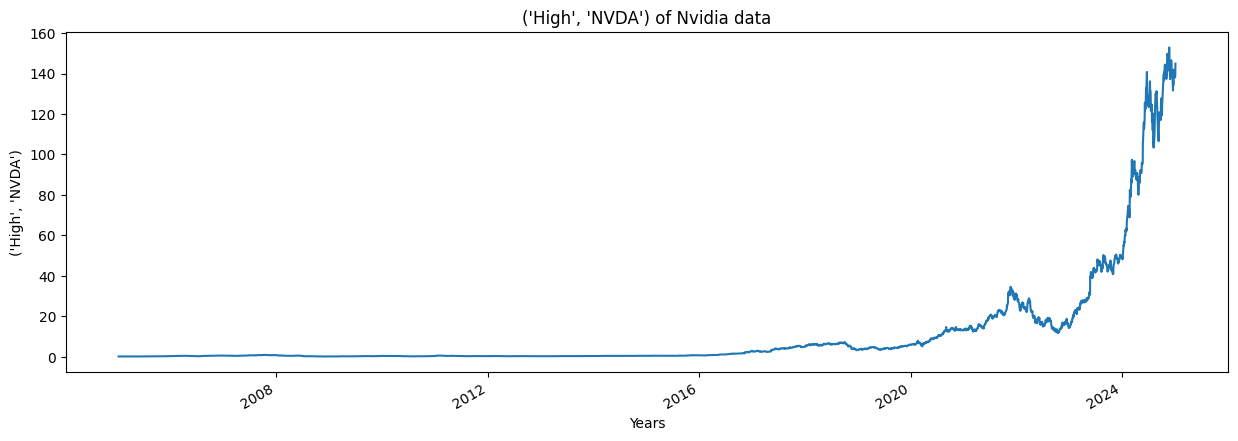

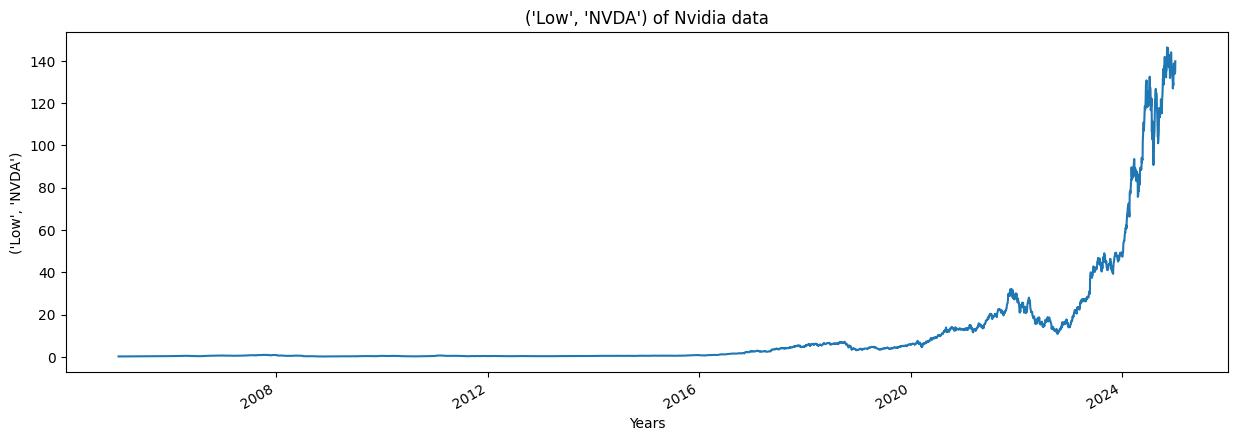

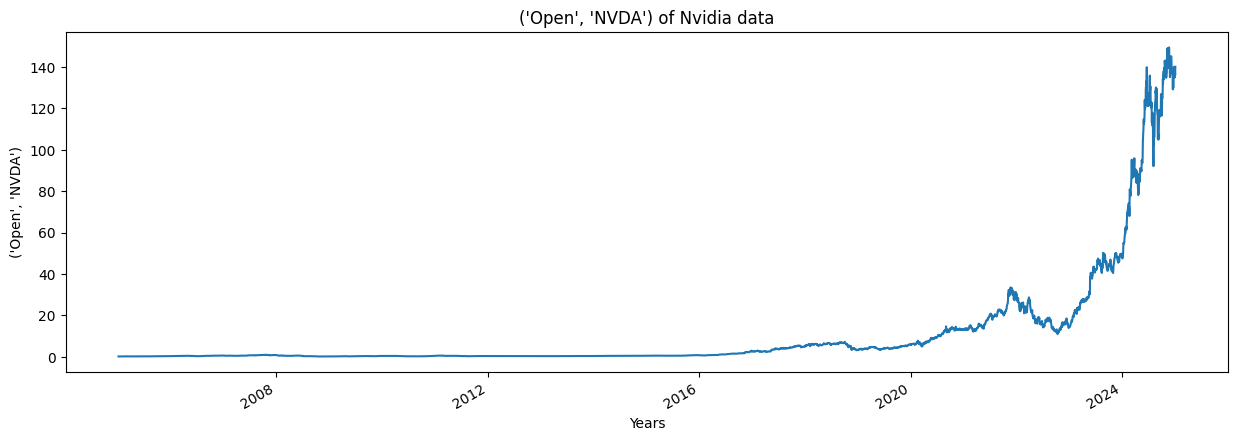

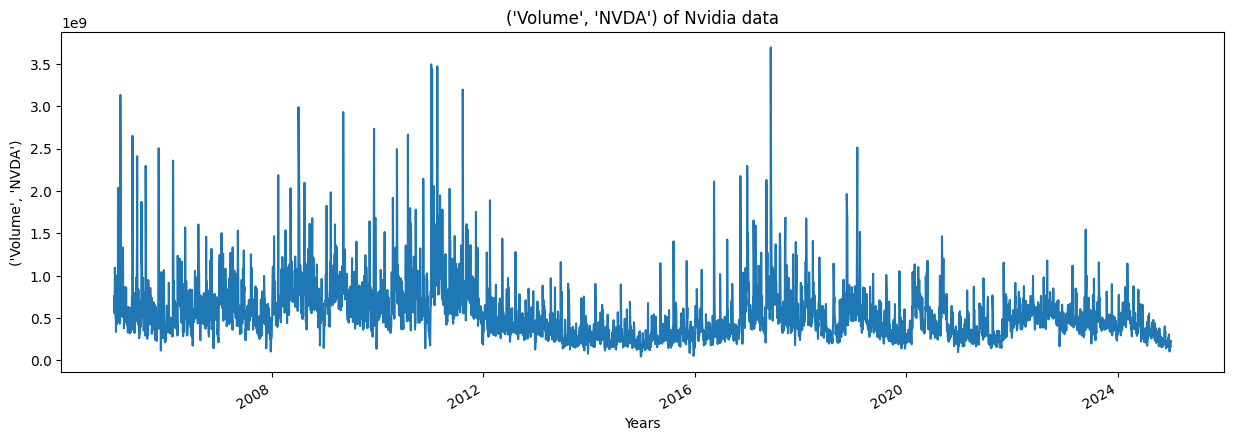

In [184]:
for column in nvidia_data.columns:
    plot_graph((15,5),nvidia_data[column], column)

In [185]:
for i in range(2005,2026):
    print(i,list(nvidia_data.index.year).count(i))

2005 249
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 2


In [186]:
nvidia_data['MA_for_250_days'] = nvidia_data['Adj Close'].rolling(250).mean()

In [187]:
nvidia_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-12-27,NaN
2005-12-28,NaN
2005-12-29,NaN
2005-12-30,NaN
2006-01-03,0.218937


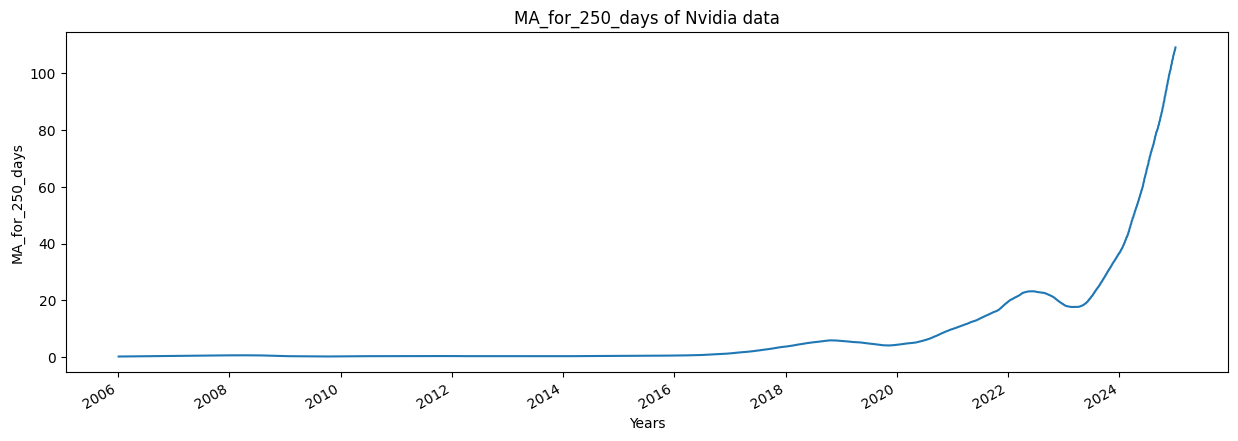

In [189]:
plot_graph((15,5), nvidia_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

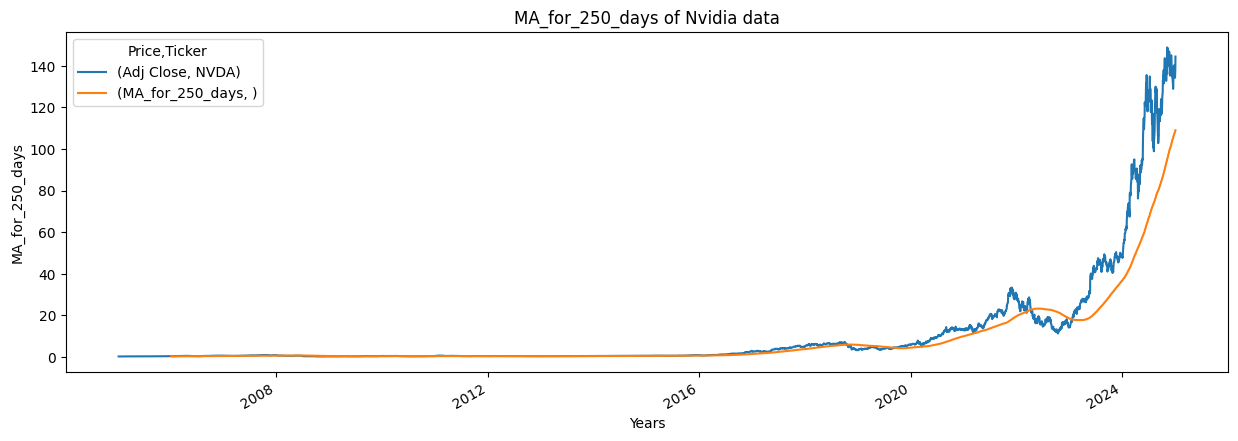

In [190]:
plot_graph((15,5), nvidia_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

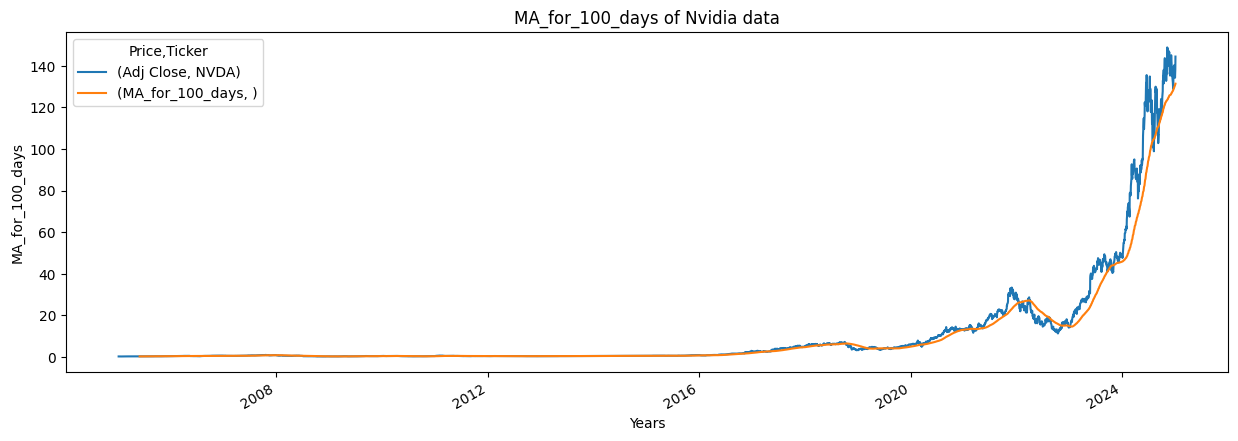

In [191]:
nvidia_data['MA_for_100_days'] = nvidia_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), nvidia_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

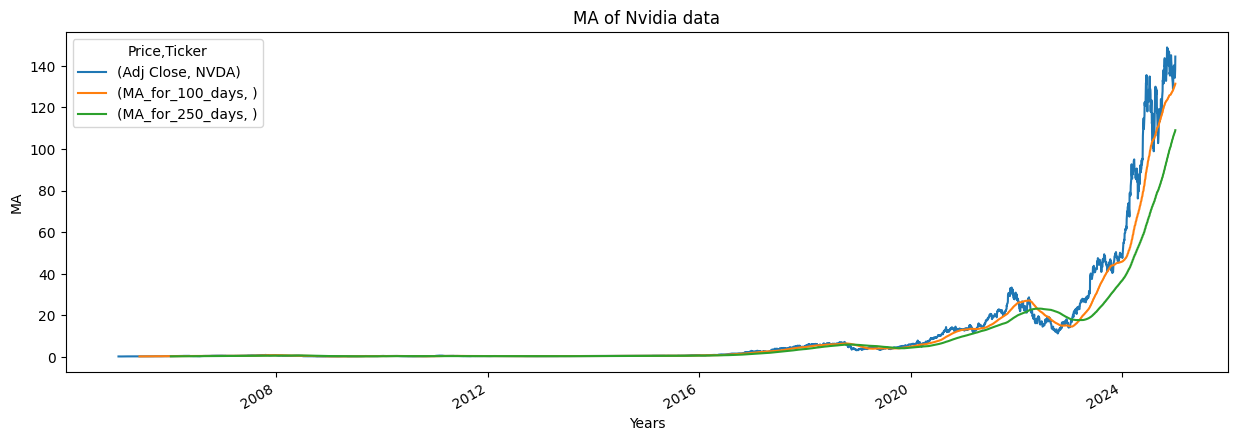

In [192]:
plot_graph((15,5), nvidia_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [193]:
nvidia_data['percentage_change_cp'] = nvidia_data['Adj Close'].pct_change()
nvidia_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,NVDA,
Date,,
2005-01-06,0.171648,NaN
2005-01-07,0.168361,-0.019149
2005-01-10,0.168744,0.002271
2005-01-11,0.163547,-0.030799
2005-01-12,0.162171,-0.008411


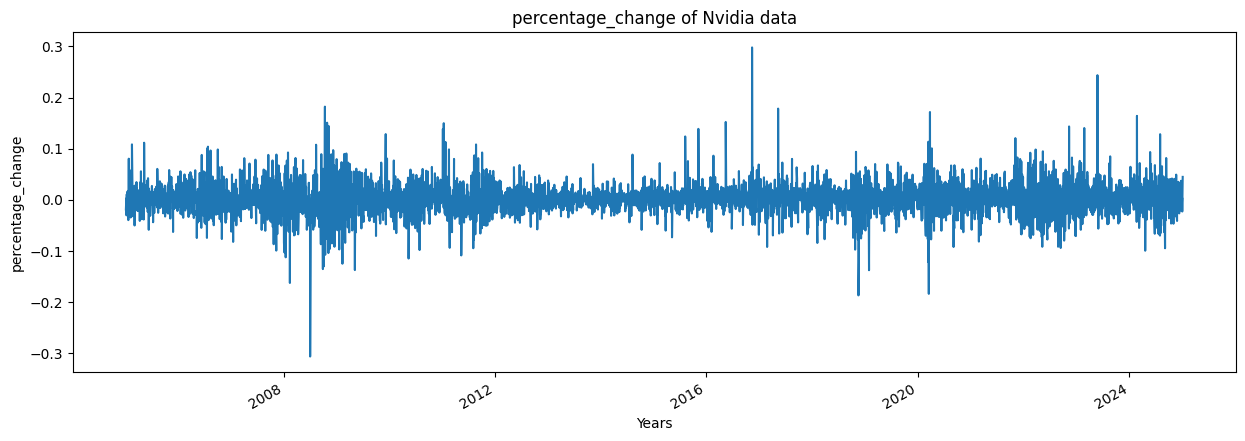

In [195]:
plot_graph((15,5), nvidia_data['percentage_change_cp'], 'percentage_change')

In [196]:
Adj_close_price = nvidia_data[['Adj Close']]

In [197]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([148.86975098]), array([0.13527007]))

In [198]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[2.44584076e-04],
       [2.22485077e-04],
       [2.25055858e-04],
       ...,
       [9.01974595e-01],
       [9.29002654e-01],
       [9.70418764e-01]])

In [199]:
len(scaled_data)

5032

In [200]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [201]:
x_data[0],y_data[0]

(array([[0.00024458],
        [0.00022249],
        [0.00022506],
        [0.00019011],
        [0.00018086],
        [0.00019217],
        [0.00019577],
        [0.00021324],
        [0.00018755],
        [0.00019011],
        [0.00019217],
        [0.00014798],
        [0.00016648],
        [0.00018035],
        [0.00026771],
        [0.00026616],
        [0.00026822],
        [0.00029031],
        [0.00035711],
        [0.00034375],
        [0.00041569],
        [0.00039976],
        [0.0004126 ],
        [0.00036636],
        [0.00039616],
        [0.00043419],
        [0.00040592],
        [0.00041774],
        [0.00041312],
        [0.0004013 ],
        [0.00054311],
        [0.00056161],
        [0.00051382],
        [0.00055134],
        [0.0005724 ],
        [0.00058011],
        [0.00057651],
        [0.00053284],
        [0.00051331],
        [0.00050715],
        [0.00052153],
        [0.00044908],
        [0.00041363],
        [0.00041312],
        [0.00038332],
        [0

In [202]:
int(len(x_data)*0.7)

3452

In [203]:
5032-100-int(len(x_data)*0.7)

1480

In [204]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [205]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [208]:
#pip install tensorflow

In [209]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [210]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [211]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [212]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 317s 91ms/step - loss: 2.6204e-05
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 317s 92ms/step - loss: 4.8719e-06


In [213]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [214]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step


In [215]:
predictions

array([[0.02524535],
       [0.02547531],
       [0.02569349],
       ...,
       [0.86136466],
       [0.8543778 ],
       [0.85383713]], dtype=float32)

In [216]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[  3.890124 ],
       [  3.9243267],
       [  3.9567776],
       ...,
       [128.2499   ],
       [127.21071  ],
       [127.13029  ]], dtype=float32)

In [217]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[  3.88448119],
       [  3.9318471 ],
       [  3.86290574],
       ...,
       [134.28999329],
       [138.30999756],
       [144.47000122]])

In [218]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [219]:
rmse

3.4069793224954887

In [220]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = nvidia_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-19,3.884481,3.890124
2019-02-20,3.931847,3.924327
2019-02-21,3.862906,3.956778
2019-02-22,3.947718,3.958505
2019-02-25,3.935319,3.975182


<Figure size 640x480 with 0 Axes>

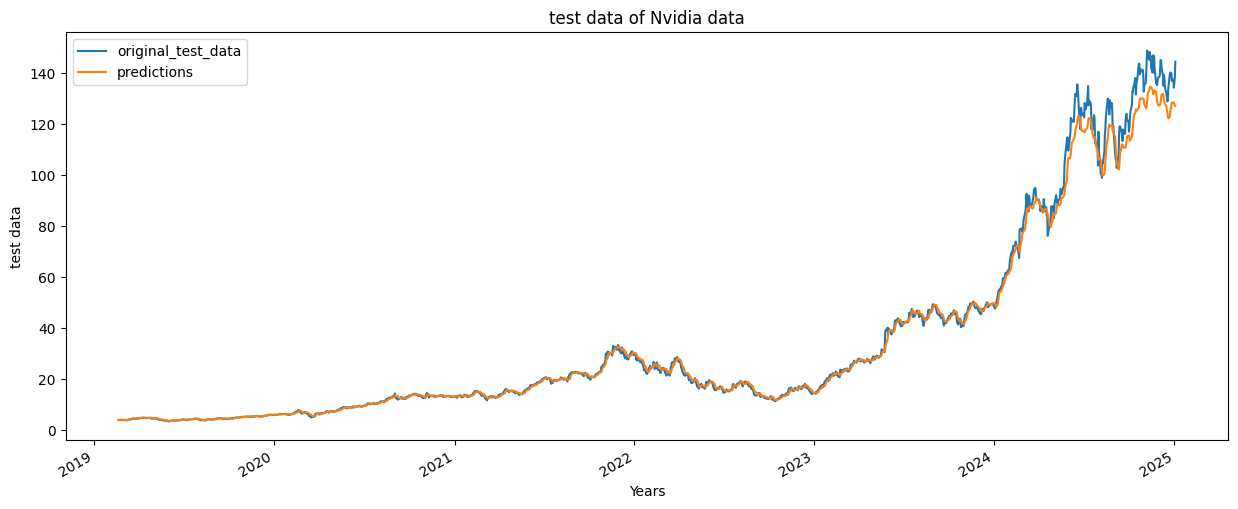

In [221]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

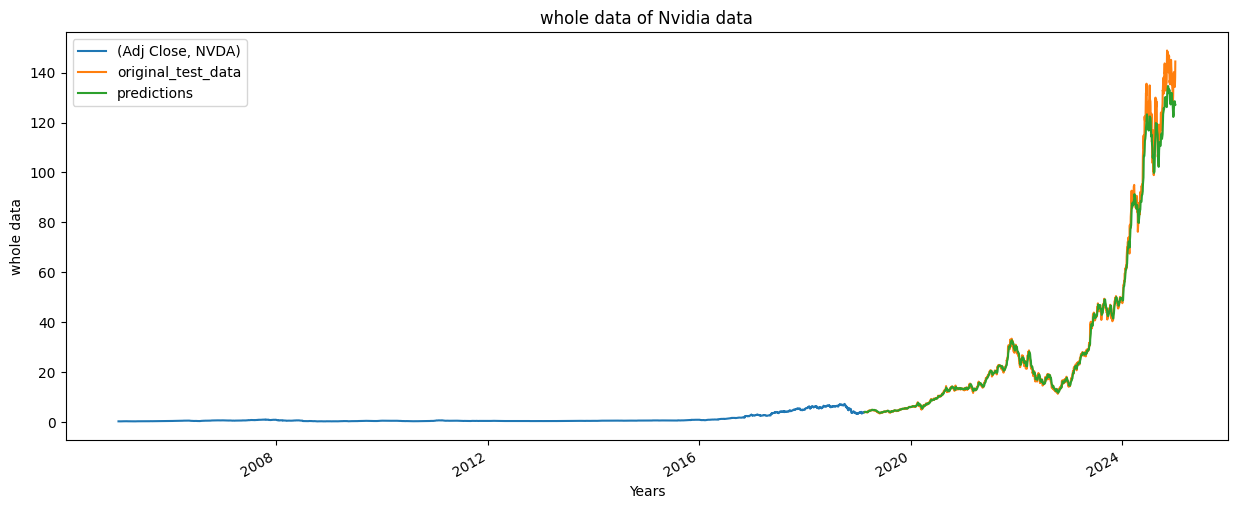

In [222]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [223]:
model.save("Latest_stock_price_model.keras")